In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000712534"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000712534
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,FIRST MERCHANTS CORP
Ticker,FRME


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
interest income,42.0,6.363488e+07,2.887621e+07,40653000.0,45882250.0,53679500.0,64847750.0,199578000.0
net income,42.0,1.399943e+07,1.383384e+07,-29729000.0,6783750.0,13898500.0,20795750.0,41713000.0
net interest income,42.0,5.241336e+07,2.197219e+07,35477000.0,37157750.0,46005500.0,58201000.0,143569000.0
provision for loan losses,42.0,7.066119e+06,1.193843e+07,417000.0,1600000.0,2243500.0,5617250.0,58995000.0


# Plots

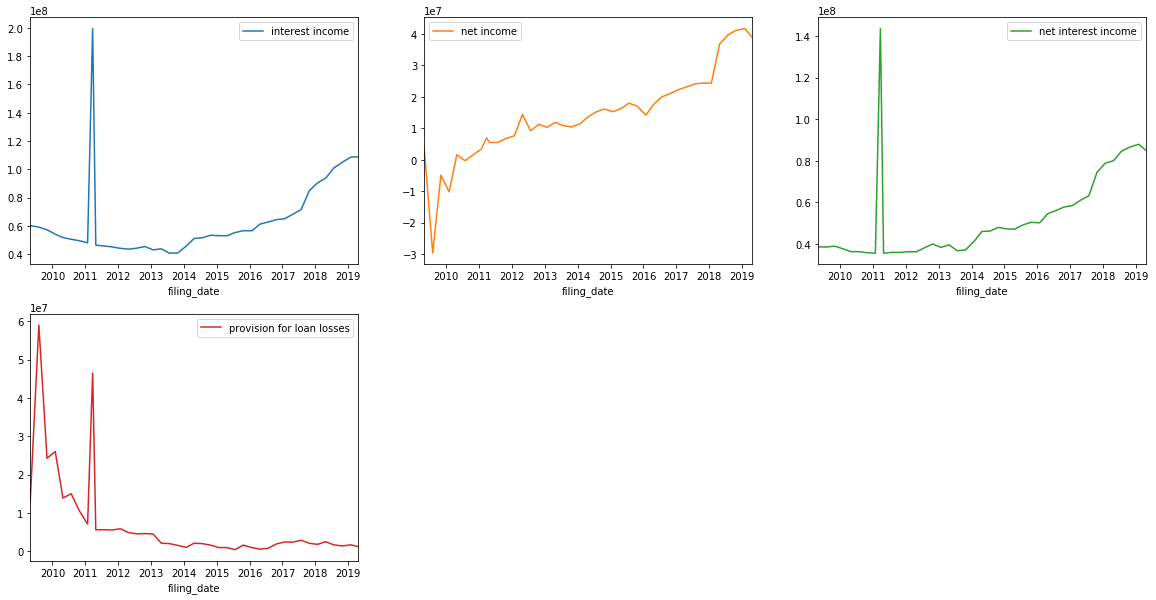

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                
0000712534 book value per share                              None      empty   
           interest income                                 2010Q4  duplicate   
           net income                                      2010Q4  duplicate   
           net interest income                             2010Q4  duplicate   
           provision for loan losses                       2010Q4  duplicate   
           provision for loan losses  2014Q1 to 2014Q2: 2 periods    missing   
           provision for loan losses                       2015Q1    missing   
           provision for loan losses  2015Q3 to 2015Q4: 2 periods    missing   
           total revenue                                     None      empty   

                                                 message  
cik        item                                           
0000712534 book value per share       No values for item  
           interest income              Duplicate period  
           net income                   Duplicate period  
           net interest income          Duplicate period  
           provision for loan losses    Duplicate period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()